In [1]:
from great_ai import query_ground_truth

data = query_ground_truth("train")

Environment variable ENVIRONMENT is not set, defaulting to development mode ‼️
Cannot find credentials files, defaulting to using ParallelTinyDbDriver
The selected tracing database (ParallelTinyDbDriver) is not recommended for production
Cannot find credentials files, defaulting to using LargeFileLocal
GreatAI (v0.1.6): configured ✅
  🔩 tracing_database: ParallelTinyDbDriver
  🔩 large_file_implementation: LargeFileLocal
  🔩 is_production: False
  🔩 should_log_exception_stack: True
  🔩 prediction_cache_size: 512
  🔩 dashboard_table_size: 50
You still need to check whether you follow all best practices before trusting your deployment.
> Find out more at https://se-ml.github.io/practices


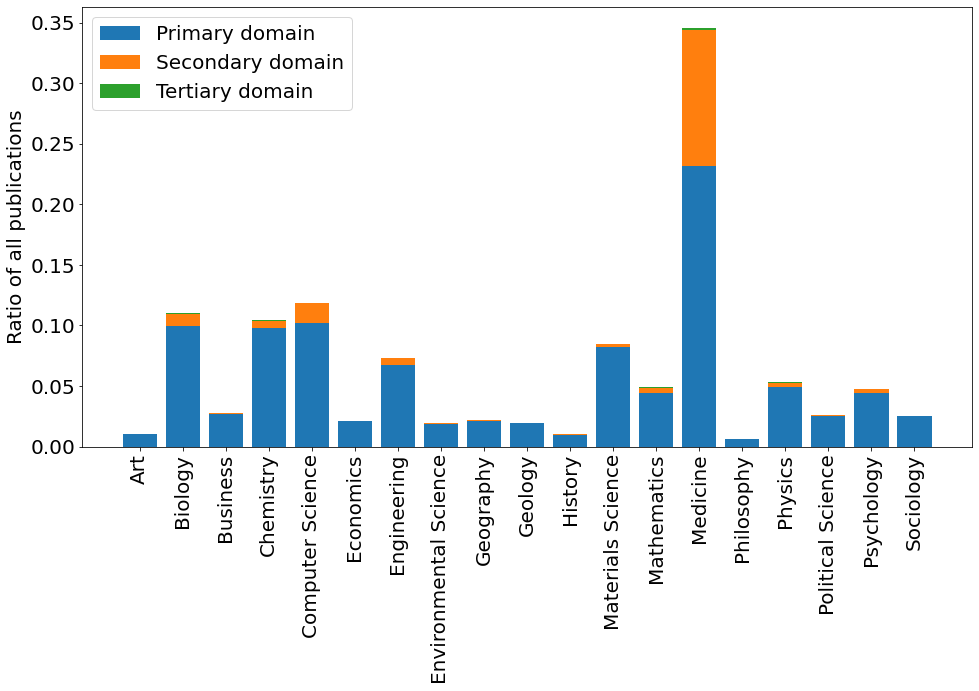

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
from great_ai.utilities import unique
import numpy as np


first = Counter(d.feedback[0] for d in data if len(d.feedback) > 0)

second = Counter(d.feedback[1] for d in data if len(d.feedback) > 1)

third = Counter(d.feedback[2] for d in data if len(d.feedback) > 2)

domains = sorted(unique(domain for d in data for domain in d.feedback))

first = [first[d] / len(data) for d in domains]

second = [second[d] / len(data) for d in domains]

third = [third[d] / len(data) for d in domains]

# Configure matplotlib to have nice, high-resolution charts
%matplotlib inline
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14, 10)

fig, ax = plt.subplots()

plt.xticks(rotation=90)

ax.bar(domains, first, label="Primary domain")
ax.bar(domains, second, label="Secondary domain", bottom=first)
ax.bar(domains, third, label="Tertiary domain", bottom=np.add(first, second))
ax.legend()
ax.set_ylabel("Ratio of all publications")
fig.tight_layout()
fig.savefig("ss-distribution.png", dpi=500)
None